## What are the chances?

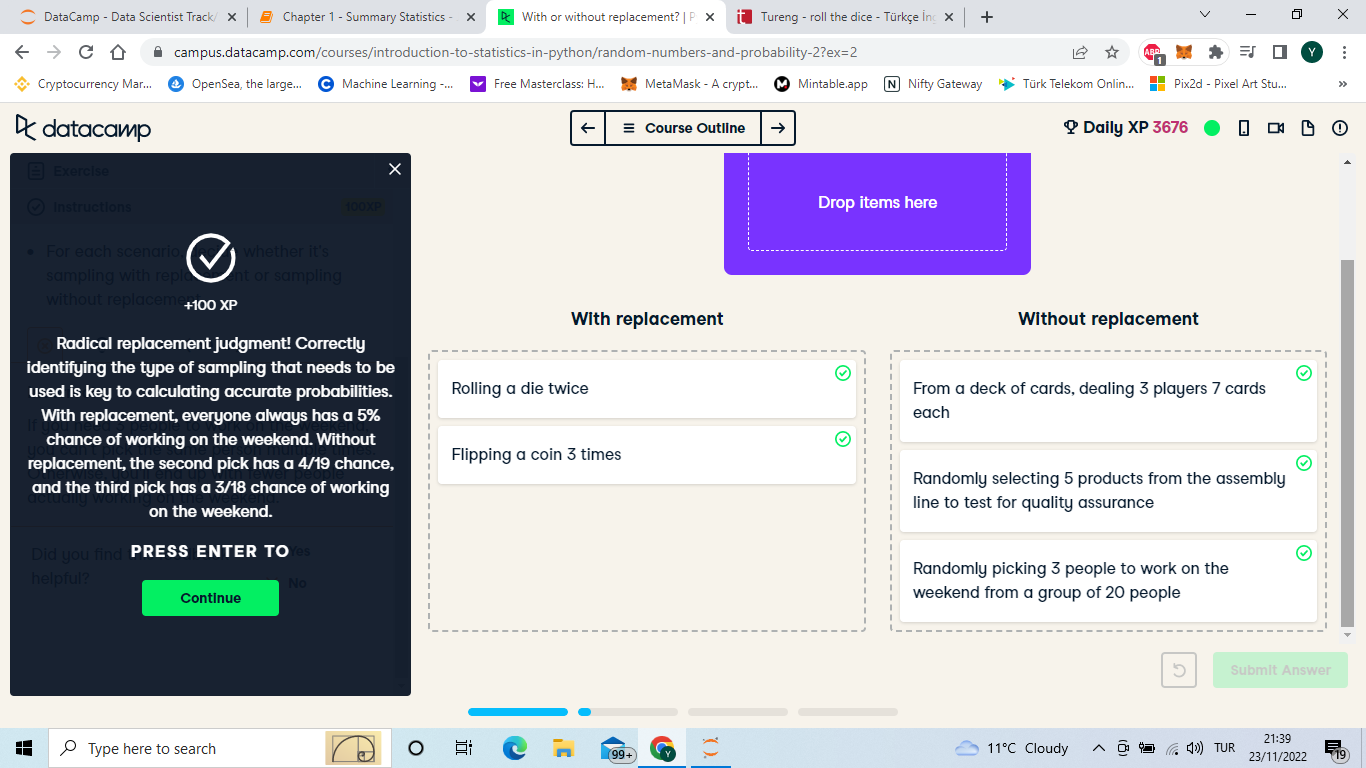

#### Calculating probabilities
You're in charge of the sales team, and it's time for performance reviews, starting with Amir. As part of the review, you want to randomly select a few of the deals that he's worked on over the past year so that you can look at them more deeply. Before you start selecting deals, you'll first figure out what the chances are of selecting certain deals.

Recall that the probability of an event can be calculated by
 

Both pandas as pd and numpy as np are loaded and amir_deals is available.

In [2]:
import pandas as pd
amir_deals = pd.read_csv("amir_deals.csv")
amir_deals

,Unnamed: 0,product,client,status,amount,num_users
0,1,Product F,Current,Won,7389.52,19
1,2,Product C,New,Won,4493.01,43
2,3,Product B,New,Won,5738.09,87
3,4,Product I,Current,Won,2591.24,83
4,5,Product E,Current,Won,6622.97,17
...,...,...,...,...,...,...
173,174,Product A,Current,Lost,5835.32,23
174,175,Product D,Current,Won,6377.50,12
175,176,Product D,Current,Won,3537.61,28
176,177,Product A,Current,Won,6448.07,34


In [3]:
# Count the deals for each product
counts = amir_deals.groupby("product")["status"].count().sort_values(ascending = False)
print(counts)

product
Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product J     2
Product G     2
Name: status, dtype: int64


In [4]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()
print(counts)

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product J     2
Product G     2
Name: product, dtype: int64


Benim yazdığım iki yukardaki kod daha profesyonel. Ama böyle de yazabiliyormuşuz.

In [5]:
# Calculate probability of picking a deal with each product
probs = counts/counts.sum()
print(probs)

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product J    0.011236
Product G    0.011236
Name: product, dtype: float64


<strong>Question</strong><br>
If you randomly select one of Amir's deals, what's the probability that the deal will involve Product C?<br>

a.15%<br>
b.80.43%<br>
<strong>c.8.43%</strong><br>
d.22.5%<br>
e.124.3%

#### Sampling deals
In the previous exercise, you counted the deals Amir worked on. Now it's time to randomly pick five deals so that you can reach out to each customer and ask if they were satisfied with the service they received. You'll try doing this both with and without replacement.

Additionally, you want to make sure this is done randomly and that it can be reproduced in case you get asked how you chose the deals, so you'll need to set the random seed before sampling from the deals.

Both pandas as pd and numpy as np are loaded and amir_deals is available.

In [6]:
import numpy as np

# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11


In [7]:
# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace = True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
133         134  Product D  Current    Won  5992.86         98
101         102  Product H  Current    Won  5116.34         63
110         111  Product B  Current    Won   696.88         44
49           50  Product B  Current    Won  3488.36         79
56           57  Product D  Current    Won  6820.84         42


<strong>Question</strong><br>
What type of sampling is better to use for this situation?<br>

a.With replacement<br>
<strong>b.Without replacement</strong><br>
c.It doesn't matter

Spectactular sampling! It's important to consider how you'll take a sample since there's no one-size-fits-all way to sample, and this can have an effect on your results.

## Discrete Distribution

#### Creating a probability distribution
A new restaurant opened a few months ago, and the restaurant's management wants to optimize its seating space based on the size of the groups that come most often. On one night, there are 10 groups of people waiting to be seated at the restaurant, but instead of being called in the order they arrived, they will be called randomly. In this exercise, you'll investigate the probability of groups of different sizes getting picked first. Data on each of the ten groups is contained in the restaurant_groups DataFrame.

Remember that expected value can be calculated by multiplying each possible outcome with its corresponding probability and taking the sum. The restaurant_groups data is available. pandas is loaded as pd, numpy is loaded as np, and matplotlib.pyplot is loaded as plt.

In [8]:
import matplotlib.pyplot as plt
restaurant_groups = pd.read_csv('restaurant_groups.txt')
restaurant_groups 

,group_id,group_size
0,A,2
1,B,4
2,C,6
3,D,2
4,E,2
5,F,2
6,G,3
7,H,2
8,I,4
9,J,2


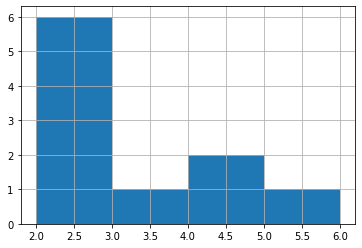

In [20]:
# Create a histogram of restaurant_groups and show plot
restaurant_groups["group_size"].hist(bins=[2,3,4,5,6])
plt.show()

In [31]:
# Create probability distribution
#size_dist = restaurant_groups["group_size"] /  restaurant_groups["group_size"].sum() #or
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
print(size_dist,'\n')

# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ["group_size", "prob"]
print(size_dist,'\n')

# Expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])
print("Expected value: ",expected_value, '\n')

# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist["group_size"] >=4 ]
print(groups_4_or_more, "\n")


# Sum the probabilities of groups_4_or_more
prob_4_or_more = np.sum(groups_4_or_more["prob"])
print(prob_4_or_more)




2    0.6
4    0.2
6    0.1
3    0.1
Name: group_size, dtype: float64 

   group_size  prob
0           2   0.6
1           4   0.2
2           6   0.1
3           3   0.1 

Expected value:  2.9000000000000004 

   group_size  prob
1           4   0.2
2           6   0.1 

0.30000000000000004


#### Identifying distributions
Which sample is most likely to have been taken from a uniform distribution? 

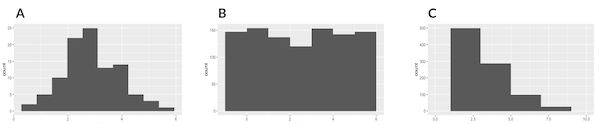

A<br>
<strong>B</strong><br>
C<br>


#### Expected value vs. sample mean
The app to the right will take a sample from a discrete uniform distribution, which includes the numbers 1 through 9, and calculate the sample's mean. You can adjust the size of the sample using the slider. Note that the expected value of this distribution is 5.

A sample is taken, and you win twenty dollars if the sample's mean is less than 4. There's a catch: you get to pick the sample's size.

Which sample size is most likely to win you the twenty dollars?

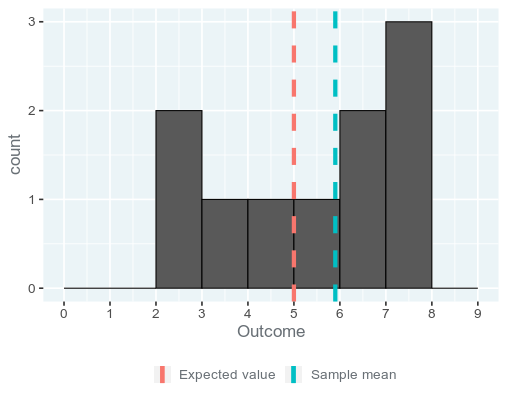

<strong>a.10</strong><br>

b.100<br>

c.1000<br>

c.5000<br>

d.10000

## Continuous Distribution

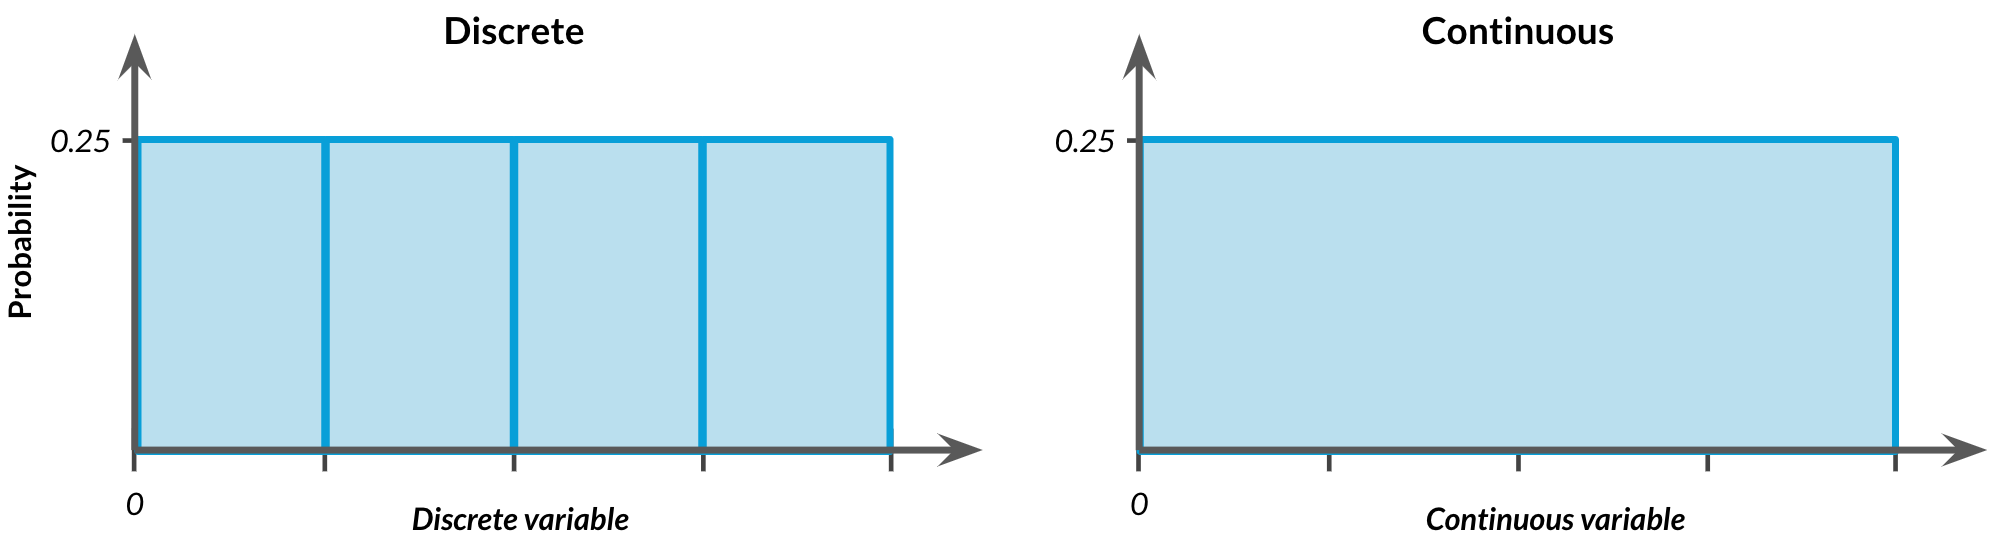

#### Which distribution?
At this point, you've learned about the two different variants of the uniform distribution: the discrete uniform distribution, and the continuous uniform distribution. In this exercise, you'll decide which situations follow which distribution.



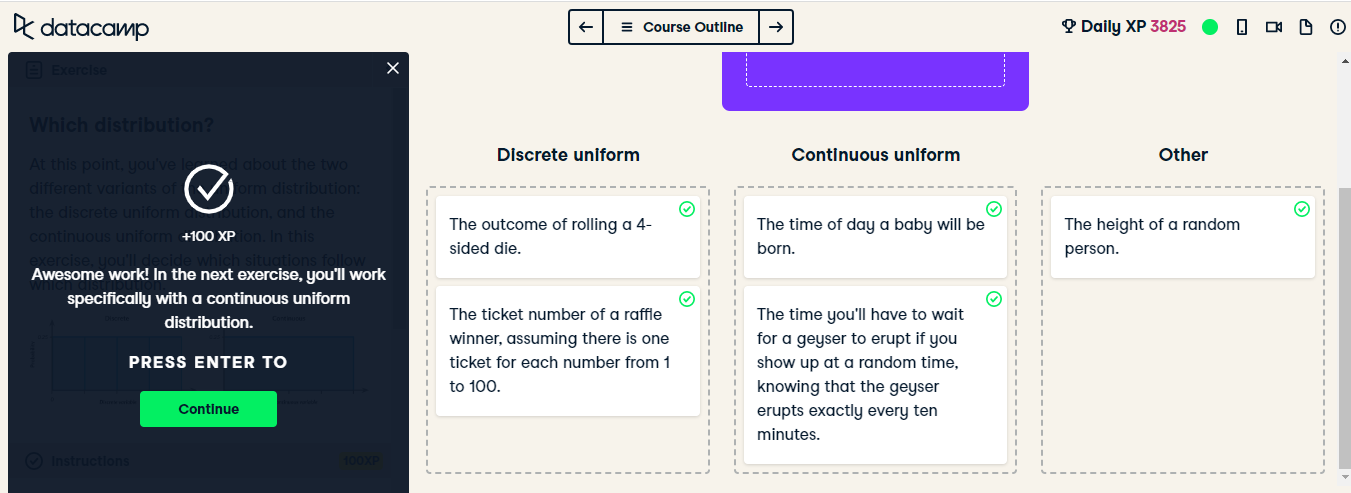

#### Data back-ups
The sales software used at your company is set to automatically back itself up, but no one knows exactly what time the back-ups happen. It is known, however, that back-ups happen exactly every 30 minutes. Amir comes back from sales meetings at random times to update the data on the client he just met with. He wants to know how long he'll have to wait for his newly-entered data to get backed up. Use your new knowledge of continuous uniform distributions to model this situation and answer Amir's questions.

In [36]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5,0,30)
print("P(t<=5):", prob_less_than_5,"\n")

# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5,0,30)
print("P(t>=5):",prob_greater_than_5,"\n")


# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20,10,30)
print("P(t>=10 and t<=20):",prob_between_10_and_20,"\n")

P(t<=5): 0.16666666666666666 

P(t>=5): 0.8333333333333334 

P(t>=10 and t<=20): 0.3333333333333333 



#### Simulating wait times
To give Amir a better idea of how long he'll have to wait, you'll simulate Amir waiting 1000 times and create a histogram to show him what he should expect. Recall from the last exercise that his minimum wait time is 0 minutes and his maximum wait time is 30 minutes.

As usual, pandas as pd, numpy as np, and matplotlib.pyplot as plt are loaded.

In [40]:
# Set random seed to 334
np.random.seed(334)

# Generate 1000 wait times between 0 and 30 mins
wait_times = np.random.uniform(0,30,1000)

print(wait_times)


[ 7.144097    0.97455866  3.72802787  5.11644319  8.70602482 24.69140099
 23.98012075  3.19592668 25.1985306  17.89048629 24.68695356 18.27160808
 22.85829011  0.12929581 15.67789664  2.3262095  15.79151771 21.90473557
 18.25817257 15.78657023 28.74328434  9.38971275 17.0010565   0.95433991
 15.96917606  2.16395679  8.903302   19.24982156  6.52414731 14.10185677
 27.86973455 14.38121016 28.59233824 13.17550521 22.96382405  2.52904371
  6.2163781   8.40217036  4.48079914 28.16365298 19.73302715  3.63959282
  1.74002295  1.5324219  26.97096908 29.37490861  4.71379092  6.44990488
  6.81999564 22.81302458 12.41563042 11.14591581  8.08043184 29.60574053
  3.24571518 19.66709277 13.38939302 29.56433707 24.84697258  6.249684
 15.07668579  5.27474477 27.27430815  2.42084219 27.88317515  0.81231424
  3.48564273 19.80738592  6.11128124 19.10323692  9.12156821 28.31696467
 20.80158047 17.0840986  26.59969632 28.38502685 20.75398728 11.73610958
 20.55950389 18.20349931  4.68857179 17.67638417 29.9

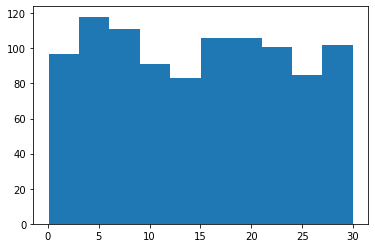

In [39]:
# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

Superb simulating! Unless Amir figures out exactly what time each backup happens, he won't be able to time his data entry so it gets backed up sooner, but it looks like he'll wait about 15 minutes on average.

## The binomial distribution

#### Simulating sales deals
Assume that Amir usually works on 3 deals per week, and overall, he wins 30% of deals he works on. Each deal has a binary outcome: it's either lost, or won, so you can model his sales deals with a binomial distribution. In this exercise, you'll help Amir simulate a year's worth of his deals so he can better understand his performance.

numpy is imported as np.

In [56]:
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

# Simulate a single deal
print("1 deal in one week: ",binom.rvs(1, 0.3, size=1), "\n")

# Simulate 1 week of 3 deals
print("3 deals in one 1 week: ", binom.rvs(3, 0.3, size = 1), "\n")

# Simulate 52 weeks of 3 deals
deals = binom.rvs(3 ,0.3, size = 52)
print("3 deals in 52 weeks: ", deals, "\n")

# Print mean deals won per week
print("P(mean deals won/week):", np.mean(deals))

1 deal in one week:  [1] 

3 deals in one 1 week:  [0] 

3 deals in 52 weeks:  [1 1 1 0 0 1 0 0 1 2 0 1 2 1 1 0 2 1 1 0 1 1 1 1 1 1 1 1 2 1 2 0 0 0 0 2 0
 1 1 2 0 2 1 1 0 2 0 0 1 0 2 0] 

P(mean deals won/week): 0.8461538461538461


Brilliant binomial simulation! In this simulated year, Amir won 0.84 deals on average each week.

#### Calculating binomial probabilities
Just as in the last exercise, assume that Amir wins 30% of deals. He wants to get an idea of how likely he is to close a certain number of deals each week. In this exercise, you'll calculate what the chances are of him closing different numbers of deals using the binomial distribution.

binom is imported from scipy.stats.

In [59]:
# Probability of closing 3 out of 3 deals with 30% probability of winning deals
prob_3 = binom.pmf(3,3,0.3)
print("P(1):",prob_3,"\n")

# Probability of closing <= 1 deal out of 3 deals with 30% probability of winning deals
prob_less_than_or_equal_1 = binom.cdf(1,3,0.3)
print("P(2):",prob_less_than_or_equal_1,"\n")

# Probability of closing > 1 deal out of 3 deals with 30% probability of winning deals
prob_greater_than_1 = 1 - binom.cdf(1,3,0.3)
print("P(3):",prob_greater_than_1)

P(1): 0.026999999999999982 

P(2): 0.7839999999999999 

P(3): 0.21600000000000008


#### How many sales will be won?
Now Amir wants to know how many deals he can expect to close each week if his win rate changes. Luckily, you can use your binomial distribution knowledge to help him calculate the expected value in different situations. Recall from the video that the expected value of a binomial distribution can be calculated by $ n \times p $

In [61]:
# Expected number won with 30% win rate
won_30pct = 3 * 0.3
print("E(3) = k * P(0.3):",won_30pct,"\n")

# Expected number won with 25% win rate
won_25pct = 3 * 0.25
print("E(3) = k * P(0.25):",won_25pct,"\n")

# Expected number won with 35% win rate
won_35pct = 3 * 0.35
print("E(3) = k * P(0.35):",won_35pct)

E(3) = k * P(0.3): 0.8999999999999999 

E(3) = k * P(0.25): 0.75 

E(3) = k * P(0.35): 1.0499999999999998


Excellent expectation experimentation! If Amir's win rate goes up by 5%, he can expect to close more than 1 deal on average each week.